In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# PSEUDOCODE
* **1** - Pick K random points as cluster centers called centroids.
* **2** - Assign each data point to nearest cluster by calculating its distance to each centroid.
* **3** - Find new cluster center by taking the average of the assigned points.
* **4** - Repeat Step 2 and 3 until none of the cluster assignments change.

# READ DATA
### The dataset comes from the R-package `cluster`. And it is an artificial data set consisting of 3000 points in 3 quite well-separated clusters.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/frandiego/data/master/xclara.csv',sep=';',decimal=b',')

# VISUSLIZE DATA

In [3]:
from plotnine import *

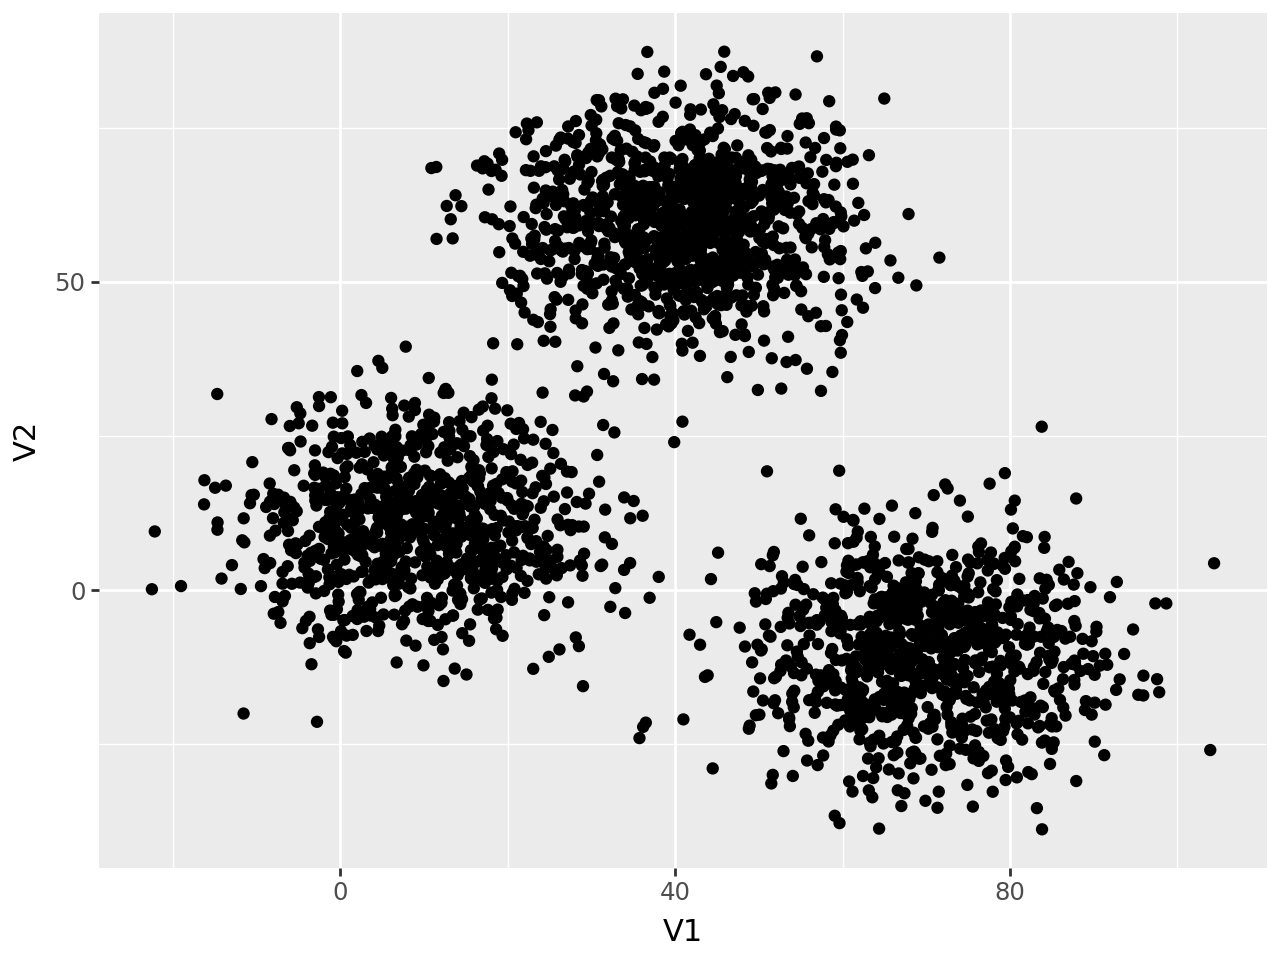

In [4]:
ggplot(df, aes(x='V1', y = 'V2')) + geom_point()

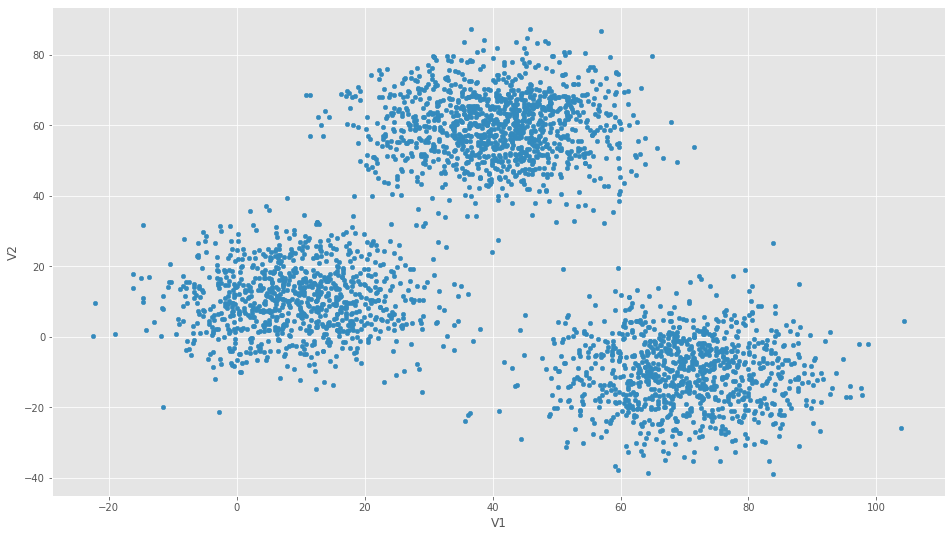

In [ ]:
df.plot.scatter('V1','V2')

# PANDAS TO MATRIX

In [5]:
X = np.array(list(zip(df.V1.values, df.V2.values)))
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

# CREATING A DISTANCE FUNCTION, LET'S SAY EUCLIDIAN DISTANCE

In [6]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# CREATING 3 RANDOM CENTROIDS

In [7]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[79. 12.]
 [52.  1.]
 [83. 52.]]


# PLOT CENTROIDS

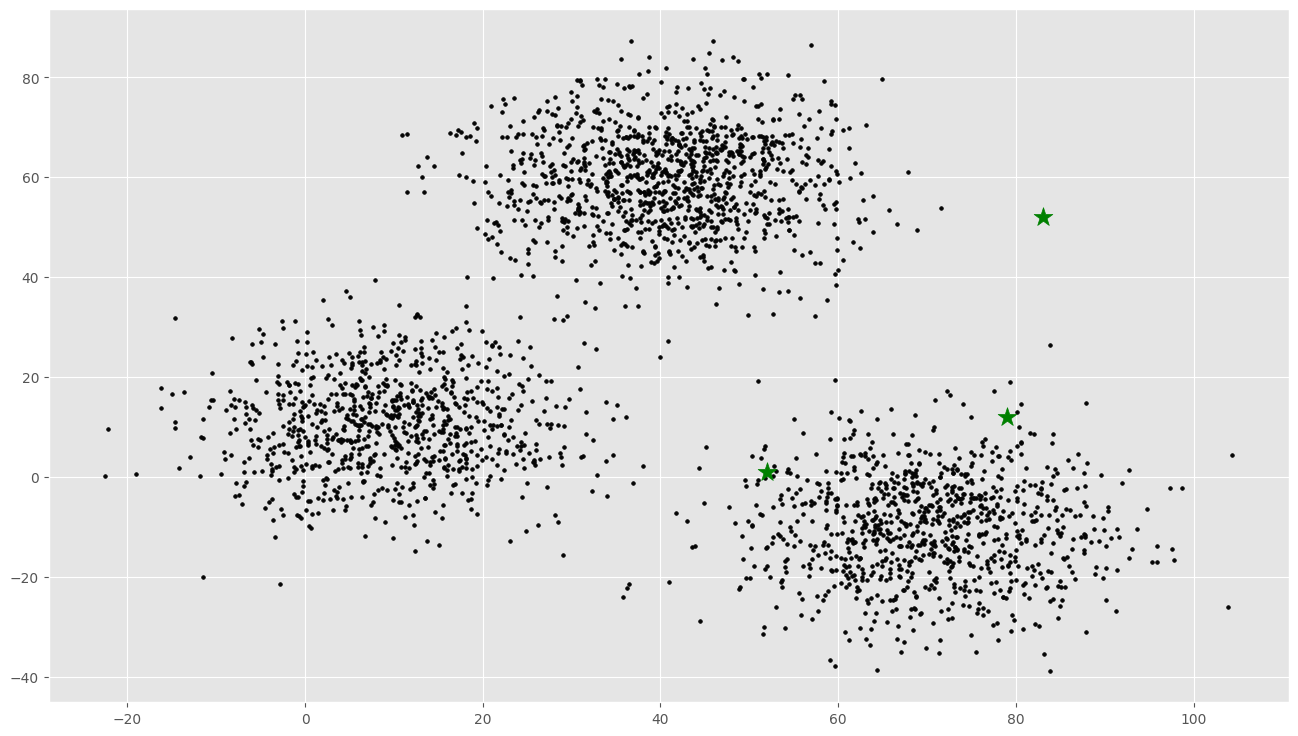

In [8]:
plt.scatter(df.V1, df.V2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

array([759, 837, 831, 245, 869, 437, 483, 879,  27, 456, 716, 405,  27,
       605,  98,  76, 468, 819, 190, 111, 747, 492, 167,  65,  84, 782,
       133, 393, 267, 215, 778, 103, 348, 774, 665, 116, 180, 254, 210,
       795, 346, 531, 508, 673, 180, 482, 283, 618, 832, 481, 455, 120,
       785, 371, 550,  82, 198, 713, 745, 220,  49, 738, 427, 568, 611,
       174, 685, 706, 734, 867,  30, 471, 438, 559, 502, 273, 817, 678,
       665,  93, 894,  75, 717, 465, 567, 202, 363, 256, 842])

10.279275808988764

In [ ]:
np.mean(points, axis=0)

array([ 9.4780459, 10.686052 ])

# ITERATE TILL CONVERGENCE

85.40025237620381
30.072275161743164
17.998756408691406
1.9066978693008423
0.47811633348464966
0.5080768465995789
0.015120625495910645


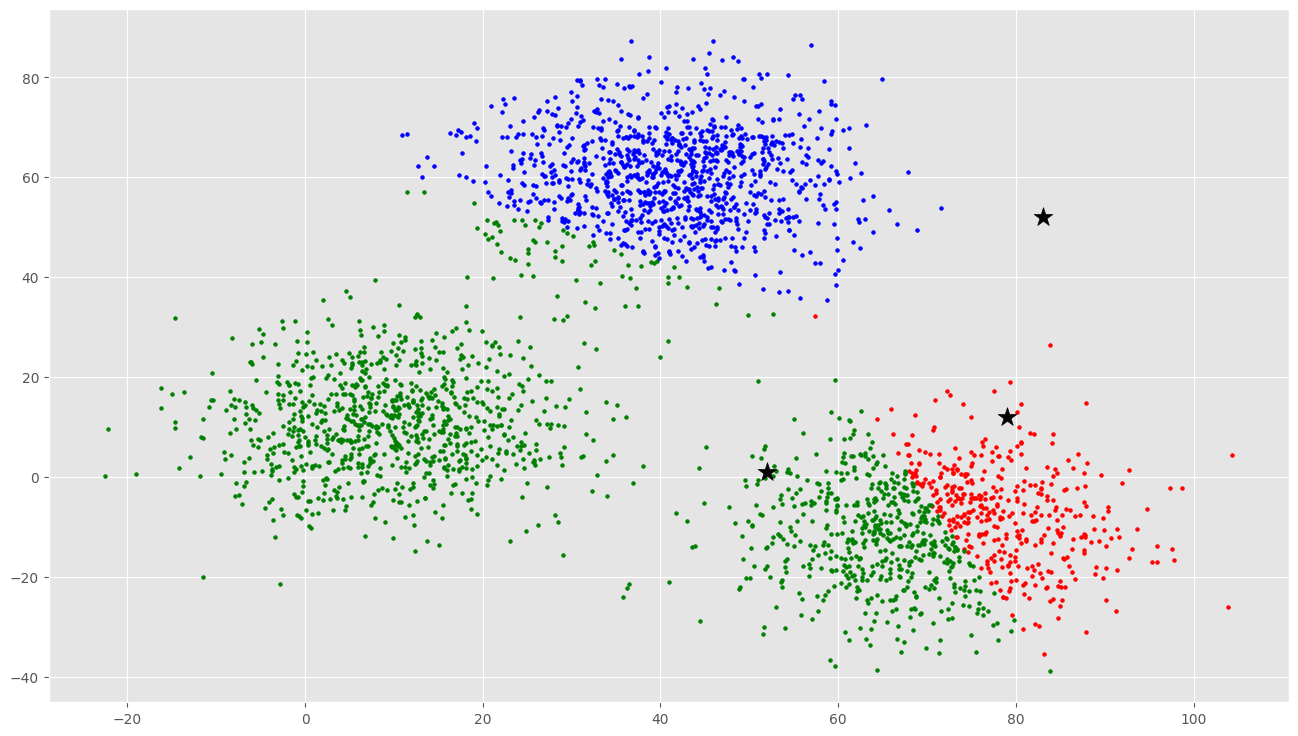

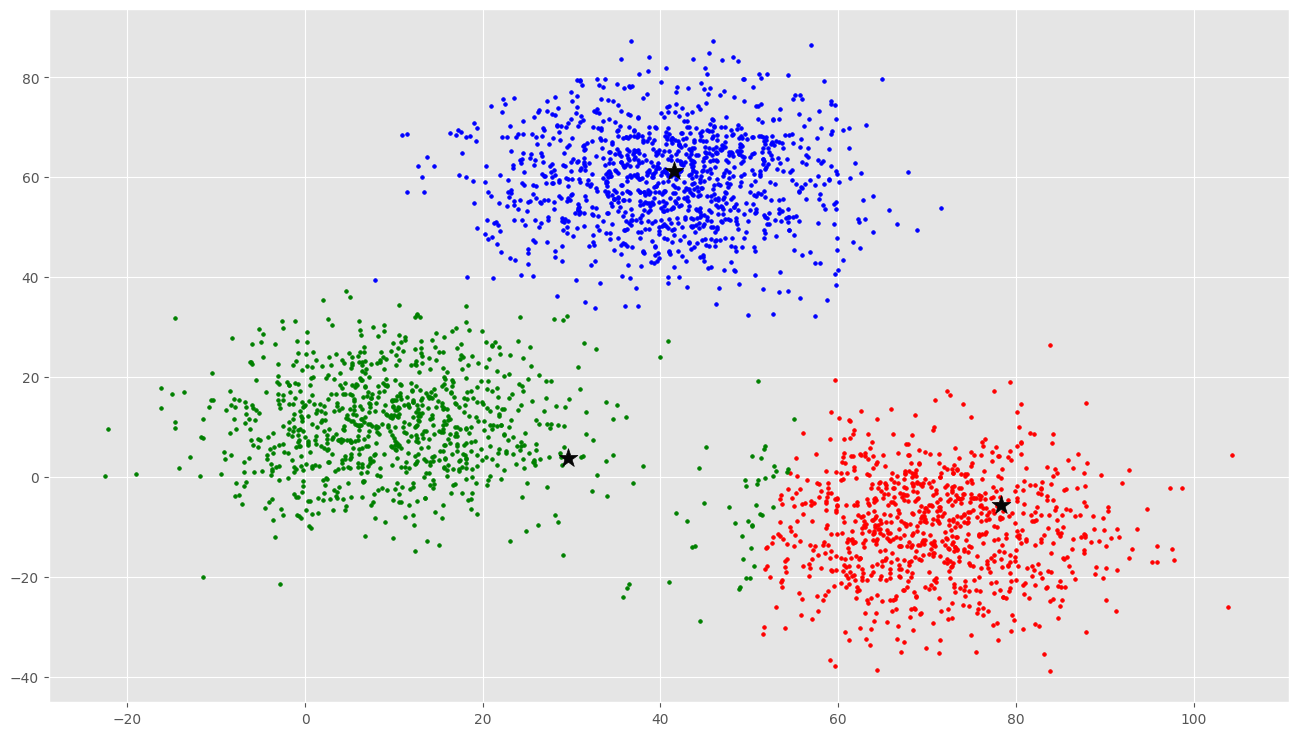

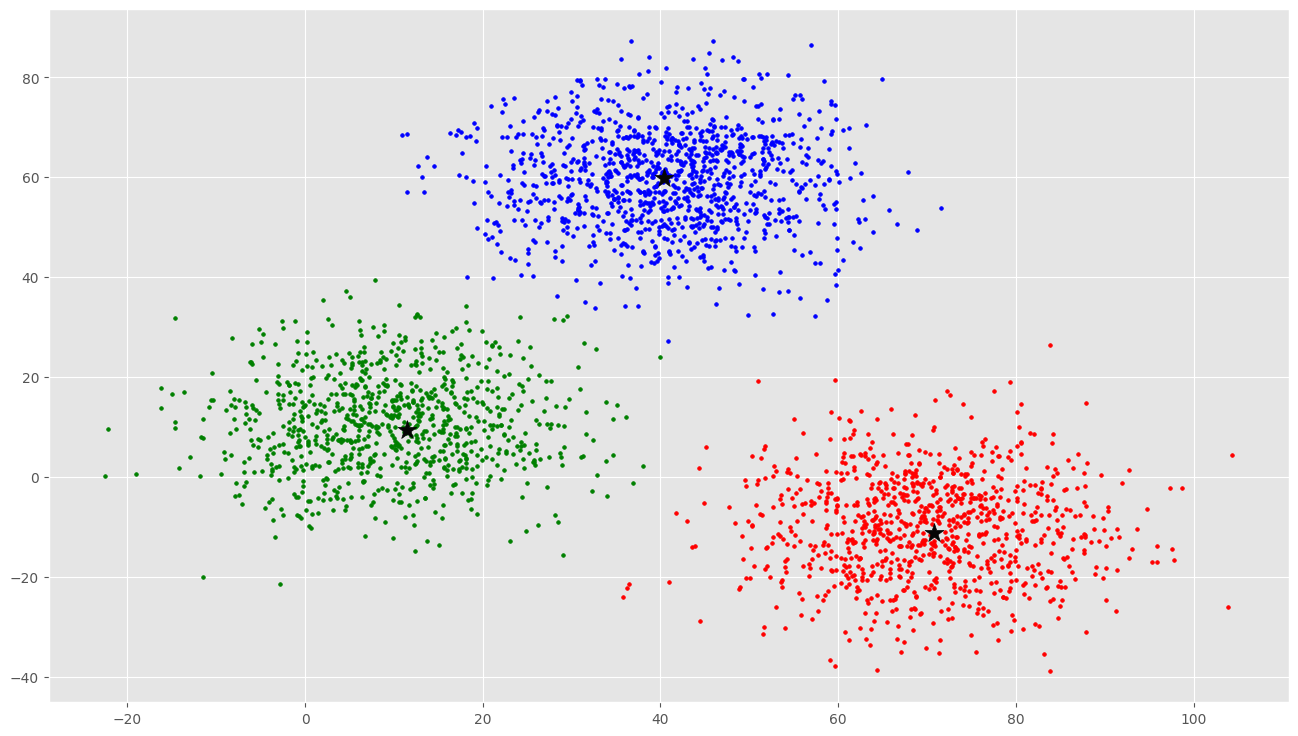

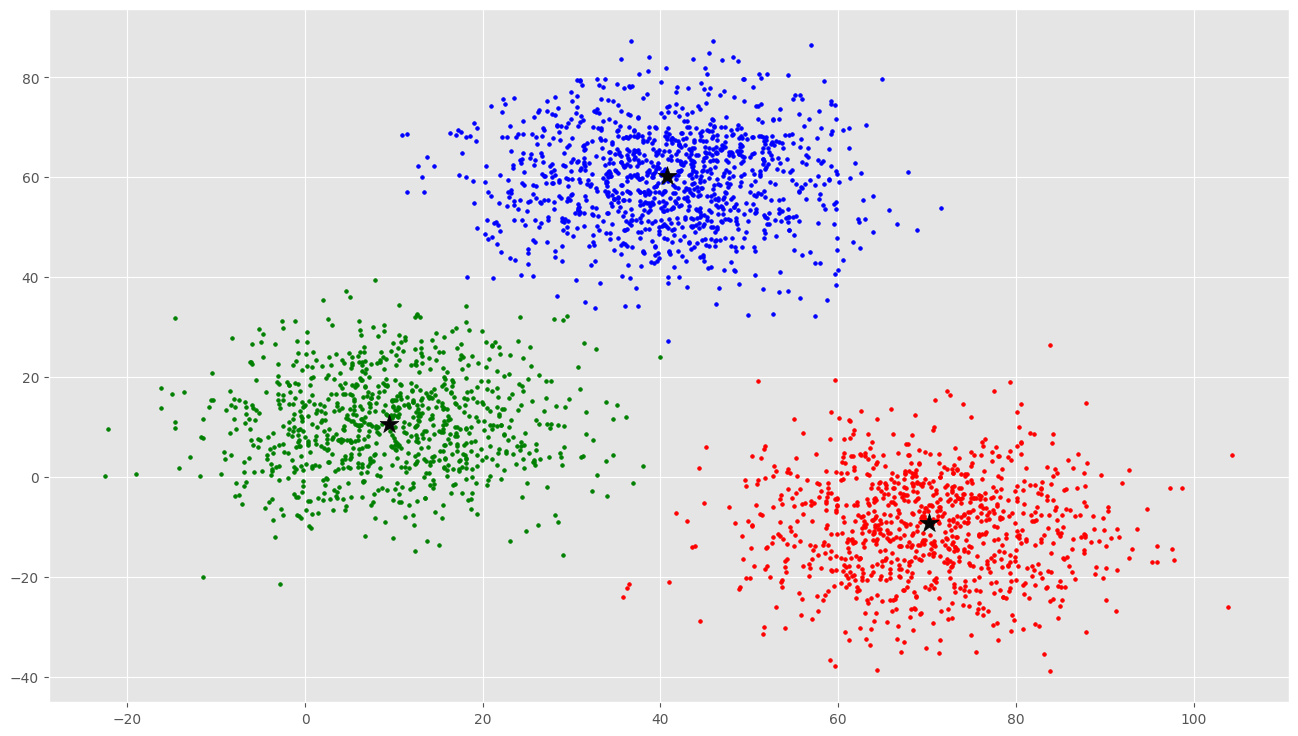

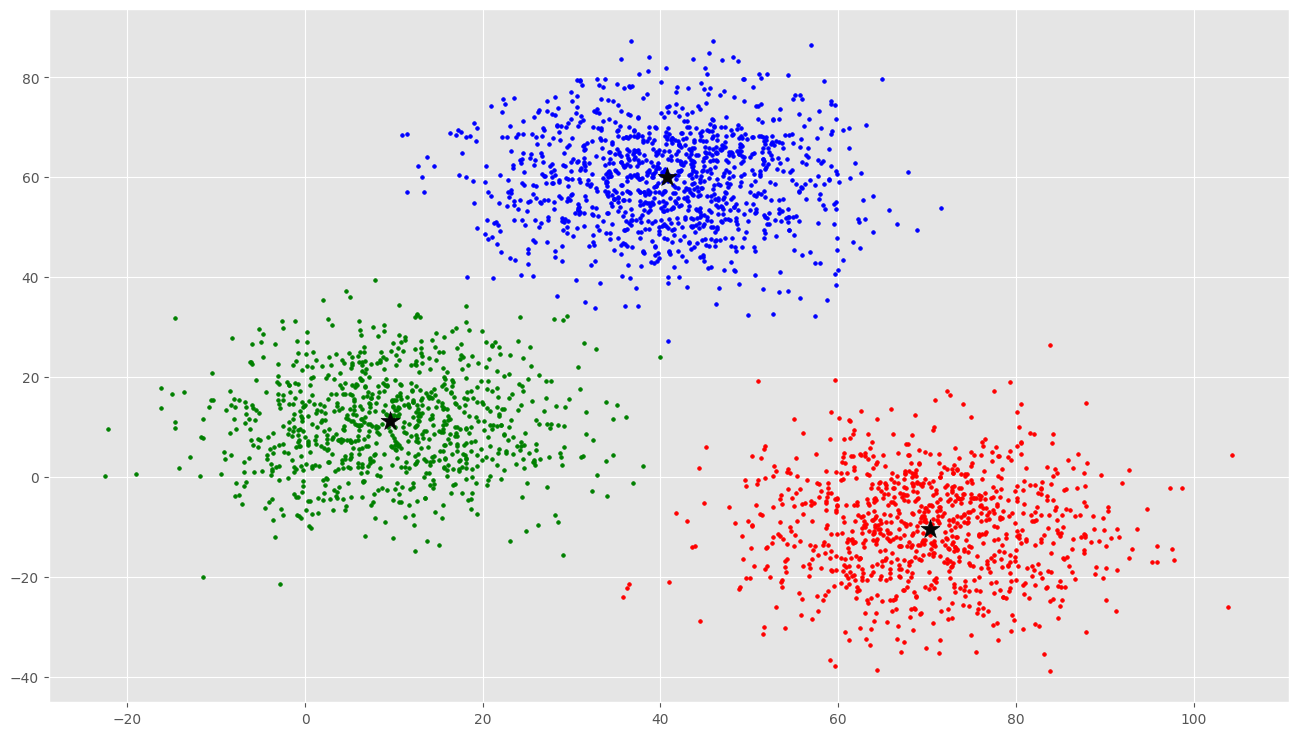

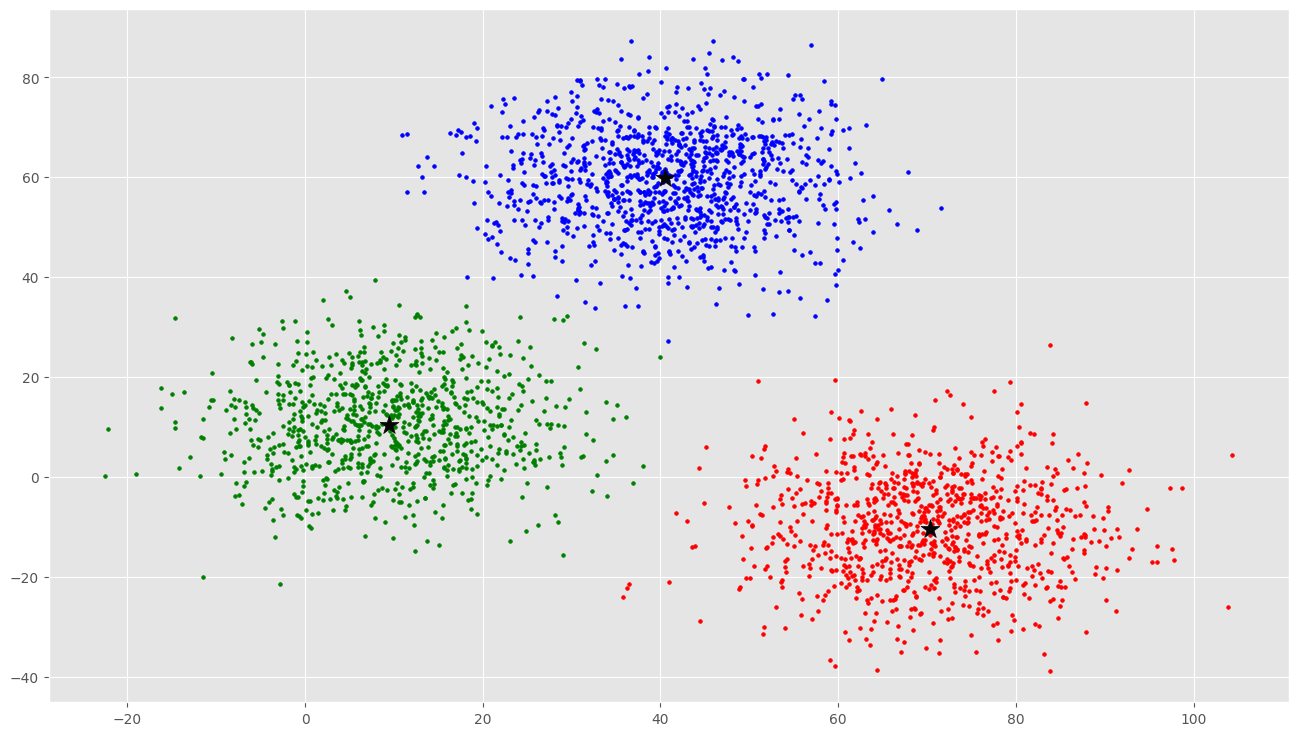

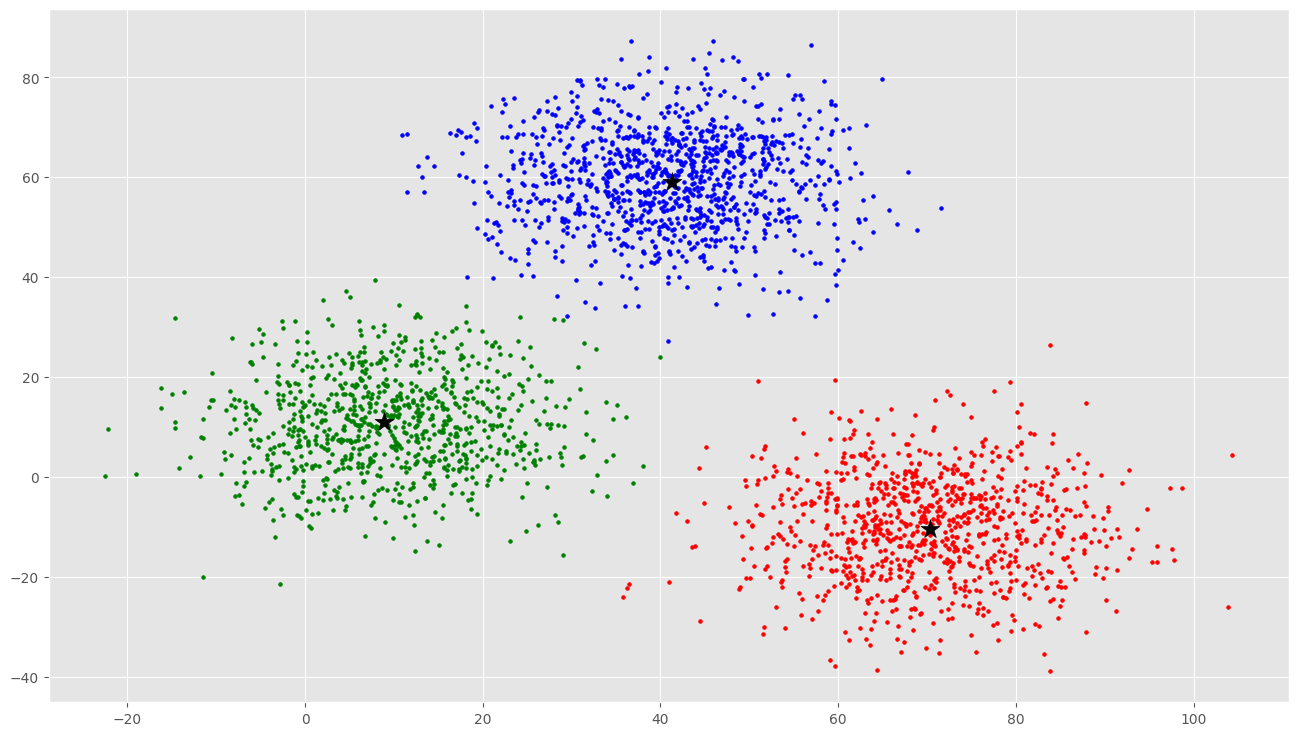

In [9]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
error_diff = 1
# Loop will run till the error becomes zero
while error_diff >= 0.05:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
        # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean([points[i] for i in np.random.choice(range(0,len(points)),int(len(points)*0.5))],axis=0)
    error_old = deepcopy(error)
    error = dist(C, C_old, None)
    error_diff = float(np.abs(error-error_old))
    print(error_diff)

In [ ]:
import time

# VISUALIZE OUTPUT

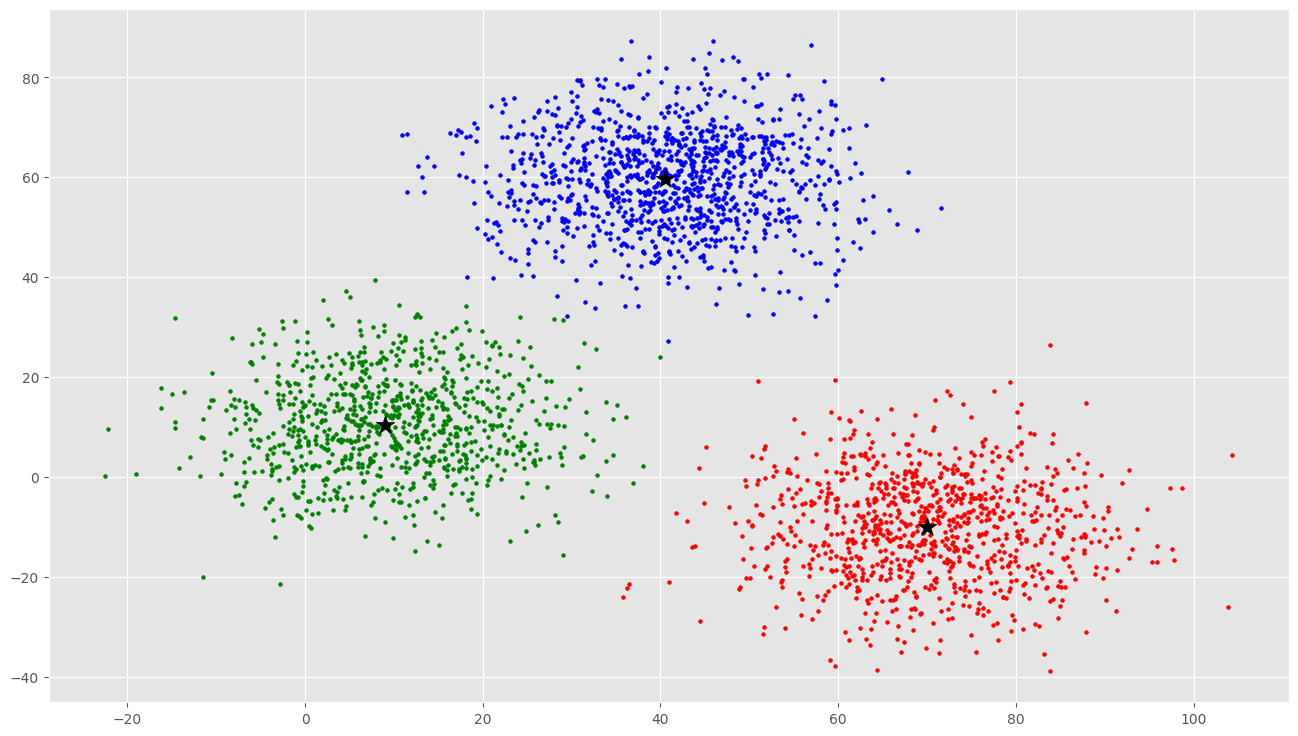

In [10]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# SKLEARN APPROACH

In [15]:
from sklearn.cluster import KMeans
k= 5
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
clusters = kmeans.transform(X)
# Centroid values
C = kmeans.cluster_centers_

In [16]:
centroids

array([[ 69.94411067, -10.15053469],
       [ 29.83480762,  61.49155005],
       [  9.32824855,  10.56580316],
       [ 44.48389866,  49.54474582],
       [ 47.37583382,  66.91859613]])

# VISUALIZE SKLEARN OUTPUT

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

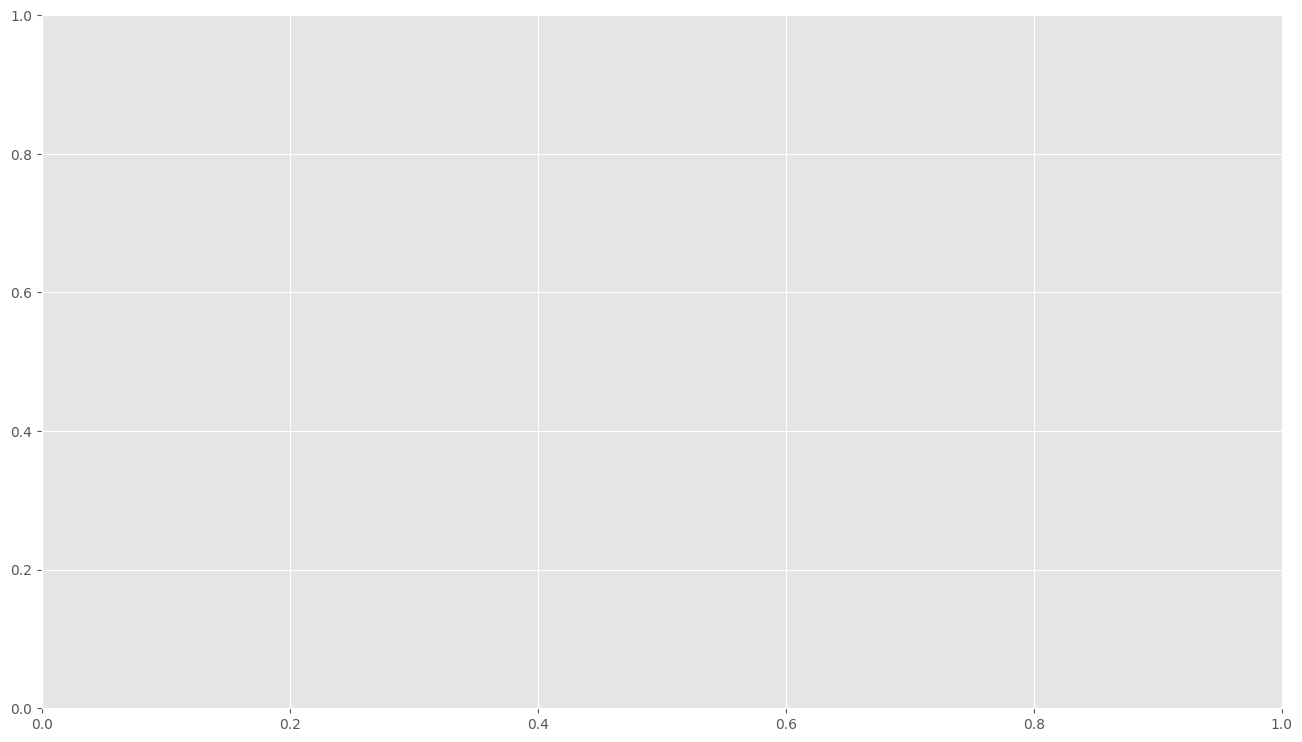

In [17]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='o', s=300, c='#050505')

# HANDMADE CENTROIDS (C) vs SKLEARN CENTROIDS (centroids)

In [ ]:
C

array([[ 40.261852,  60.394913],
       [ 69.947784, -10.313642],
       [  8.632435,  10.273908]], dtype=float32)

In [ ]:
centroids

array([[ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ],
       [ 40.68362784,  59.71589274]])